# Mall customers

## Imports


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

## Load Dataset

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## make our dataset more beautiful !

In [4]:
df.drop('CustomerID', axis=1, inplace=True)

In [7]:
df.columns = ['gender', 'age', 'income', 'score']
df

,gender,age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


## Check if have any missing value

In [8]:
df.isna().sum()

gender    0
age       0
income    0
score     0
dtype: int64

fortunately we don't have any missing value 🧐

## Encoding categorical feature (gender)

we set 1 for men and 0 for women

In [10]:
df.gender = df.gender.apply(lambda x: 1 if x == 'Male' else 0)
df

,gender,age,income,score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


## some details of our dataset

In [11]:
df.describe()

,gender,age,income,score
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


## Let's plot features !!!

array([[<Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'score'}>]], dtype=object)

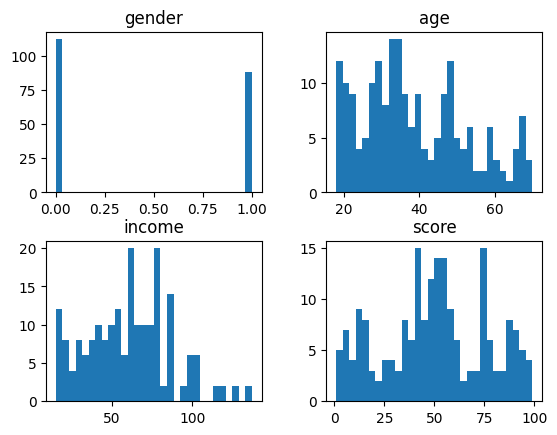

In [15]:
df.hist(bins=30, grid=False)

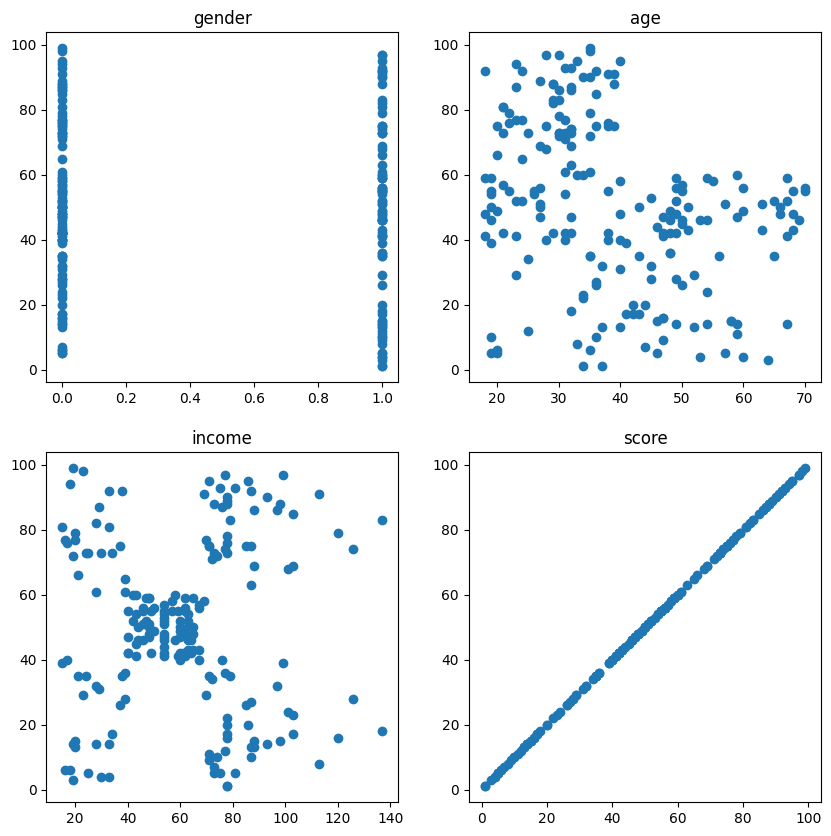

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes_flat = axes.flatten()

for i, col in enumerate(df.columns):
  ax = axes_flat[i]
  ax.scatter(df[col], df['score'])
  ax.set_title(col)

In our income feature, we see some clusters 😉

In [19]:
corr = df.corr()
corr

,gender,age,income,score
gender,1.000000,0.060867,0.056410,-0.058109
age,0.060867,1.000000,-0.012398,-0.327227
income,0.056410,-0.012398,1.000000,0.009903
score,-0.058109,-0.327227,0.009903,1.000000


<Axes: >

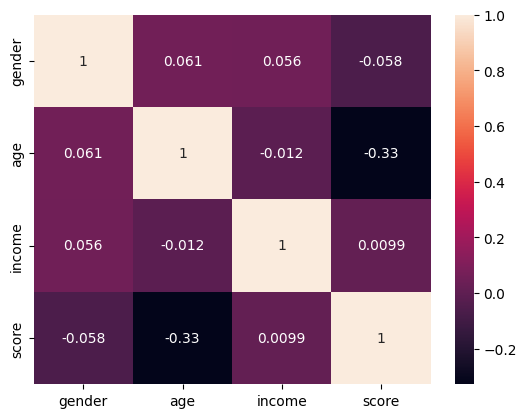

In [21]:
sns.heatmap(corr, annot=True)

In [33]:
age_desc = df['age'].describe()
age_desc

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: age, dtype: float64

In [49]:
age_median = age_desc[5]
age_median

36.0

In [51]:
age_color = df['age'].apply(lambda age: 0 if age < age_median else 1)
age_color

0      0
1      0
2      0
3      0
4      0
      ..
195    0
196    1
197    0
198    0
199    0
Name: age, Length: 200, dtype: int64

In [65]:
age_color[age_color == 1]

8      1
10     1
12     1
14     1
18     1
      ..
188    1
189    1
193    1
194    1
196    1
Name: age, Length: 102, dtype: int64

Text(0, 0.5, 'score')

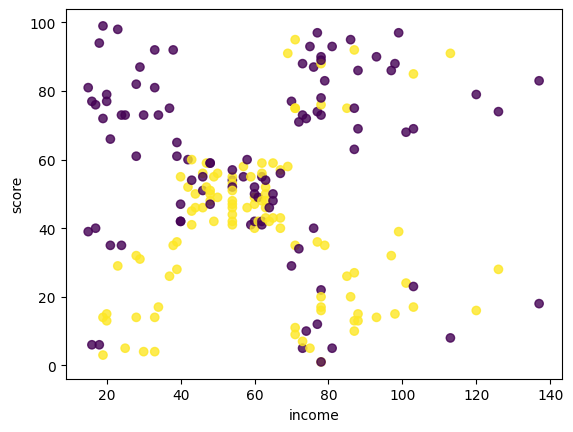

In [63]:
plt.scatter(df['income'], df['score'], c=age_color, alpha=0.8)
plt.xlabel('income')
plt.ylabel('score')

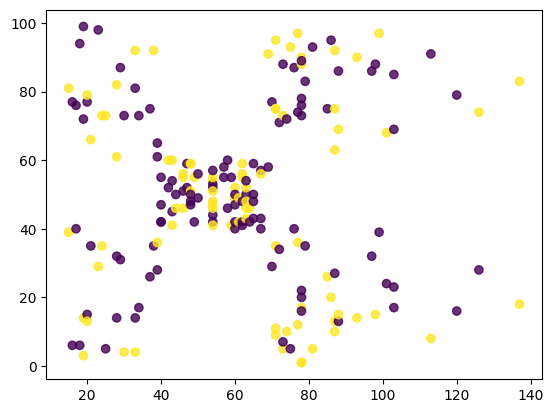

In [29]:
plt.scatter(df['income'], df['score'], c=df['gender'], alpha=0.8)

In [70]:
income_desc = df['income'].describe()
income_desc

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: income, dtype: float64

In [71]:
income_mean = df['income'].mean()
income_mean

60.56

In [72]:
income_color = df['income'].apply(lambda income: 1 if income >= income_mean else 0)
income_color

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: income, Length: 200, dtype: int64

Text(0, 0.5, 'score')

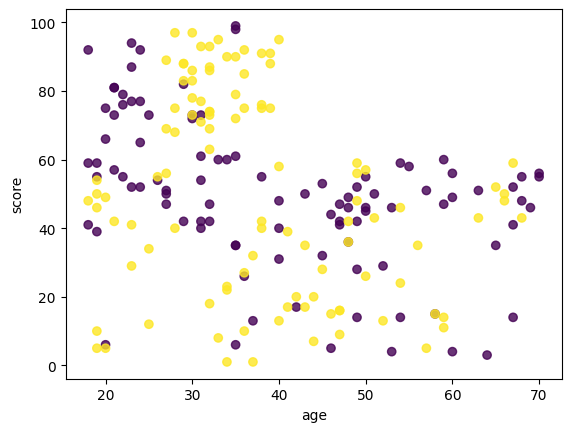

In [73]:
plt.scatter(df['age'], df['score'],c=income_color, alpha=0.8)
plt.xlabel('age')
plt.ylabel('score')

## Convert Dataframe to numpy array

In [78]:
x_train = np.array(df)
x_train.shape

(200, 4)

## Using Elbow Technique to find the best n_cluster

In [86]:
wcss = []

for k in range(1, 11):
  model = KMeans(n_clusters=k, n_init='auto', random_state=42)
  model.fit(x_train)
  wcss.append(model.inertia_)

Text(0, 0.5, 'wcss')

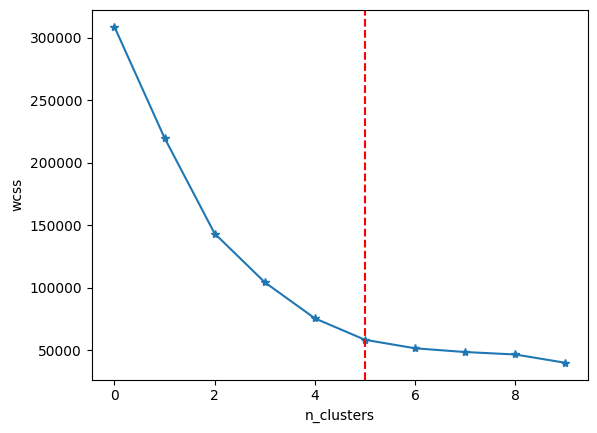

In [91]:
plt.plot(wcss, marker='*')
plt.axvline(x=5, color='r', linestyle='--')
plt.xlabel('n_clusters')
plt.ylabel('wcss')

## Model

In [79]:
kmeans = KMeans(n_clusters=5,n_init='auto', random_state=42)
kmeans.fit(x_train)

KMeans(n_clusters=5, n_init='auto', random_state=42)

In [81]:
y_pred = kmeans.labels_
y_pred

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4,
       0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

## Plot the predicted clusters

Text(0, 0.5, 'score')

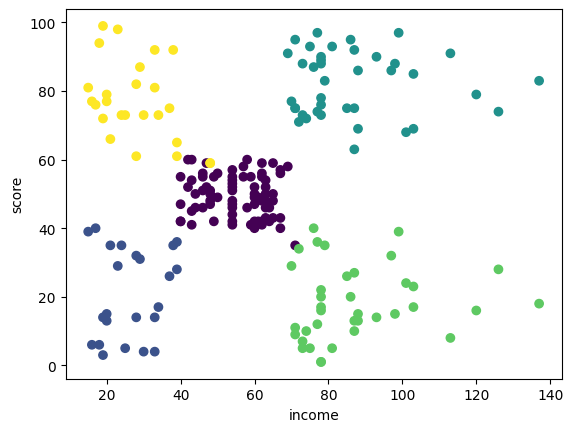

In [83]:
plt.scatter(df['income'], df['score'], c=y_pred)
plt.xlabel('income')
plt.ylabel('score')

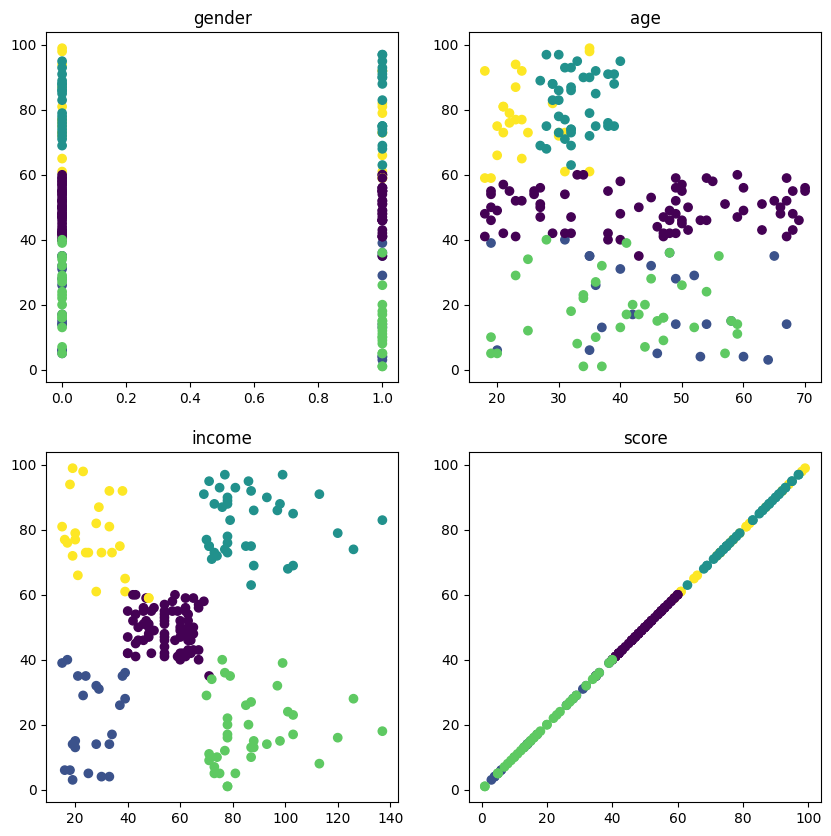

In [85]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes_flat = axes.flatten()

for i, col in enumerate(df.columns):
  ax = axes_flat[i]
  ax.scatter(df[col], df['score'], c=y_pred)
  ax.set_title(col)

In [94]:
df['cluster'] = y_pred
df

,gender,age,income,score,cluster
0,1,19,15,39,1
1,1,21,15,81,4
2,0,20,16,6,1
3,0,23,16,77,4
4,0,31,17,40,1
...,...,...,...,...,...
195,0,35,120,79,2
196,0,45,126,28,3
197,1,32,126,74,2
198,1,32,137,18,3


Text(0, 0.5, 'score')

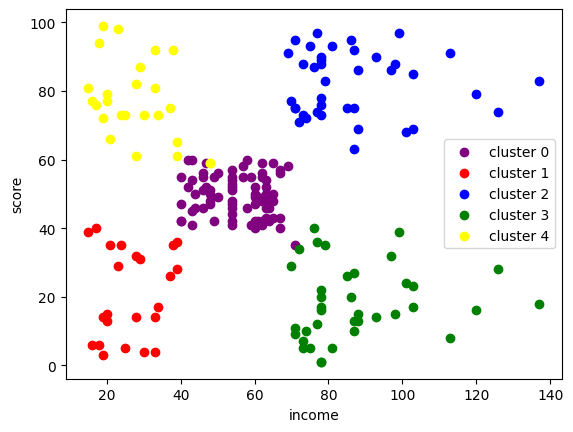

In [97]:
colors = ['purple', 'red', 'blue', 'green', 'yellow']

for i in range(5):
  plt.scatter(df['income'][df['cluster'] == i], df['score'][df['cluster'] == i], label=f'cluster {i}', c=colors[i])
  plt.legend()
plt.xlabel('income')
plt.ylabel('score')

Text(0, 0.5, 'score')

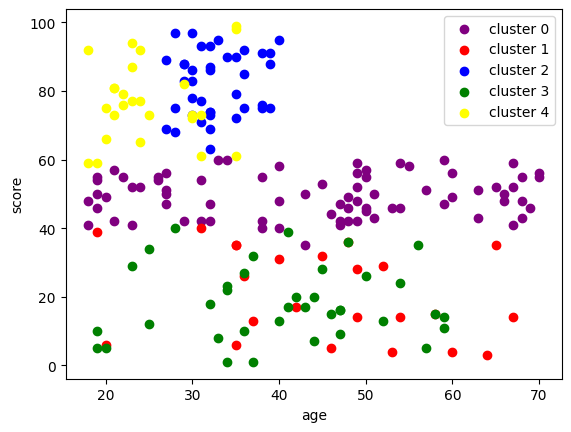

In [101]:
colors = ['purple', 'red', 'blue', 'green', 'yellow']

for i in range(5):
  plt.scatter(df['age'][df['cluster'] == i], df['score'][df['cluster'] == i], label=f'cluster {i}', c=colors[i])
  plt.legend()
plt.xlabel('age')
plt.ylabel('score')

Text(0, 0.5, 'age')

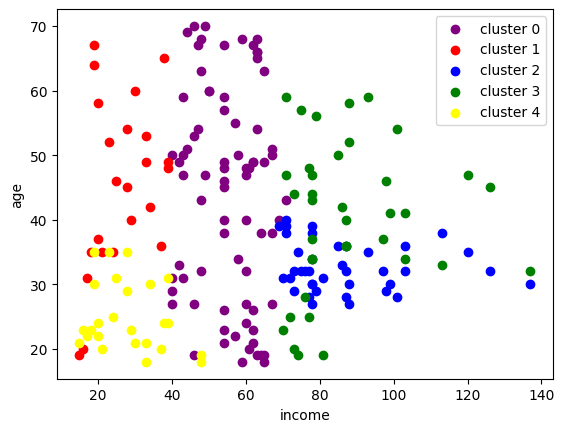

In [102]:
colors = ['purple', 'red', 'blue', 'green', 'yellow']

for i in range(5):
  plt.scatter(df['income'][df['cluster'] == i], df['age'][df['cluster'] == i], label=f'cluster {i}', c=colors[i])
  plt.legend()
plt.xlabel('income')
plt.ylabel('age')

In [100]:
for i in range(5):
  print(f'There are {len(df[df.cluster == i])} people in cluster {i}')

There are 76 people in cluster 0
There are 23 people in cluster 1
There are 39 people in cluster 2
There are 37 people in cluster 3
There are 25 people in cluster 4
